In [6]:
import pandas as pd

train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

### Thông tin cơ bản về dữ liệu ###
print(train.head())
print(train.info())
print(train.describe())
print(train.shape)
print(train.columns)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

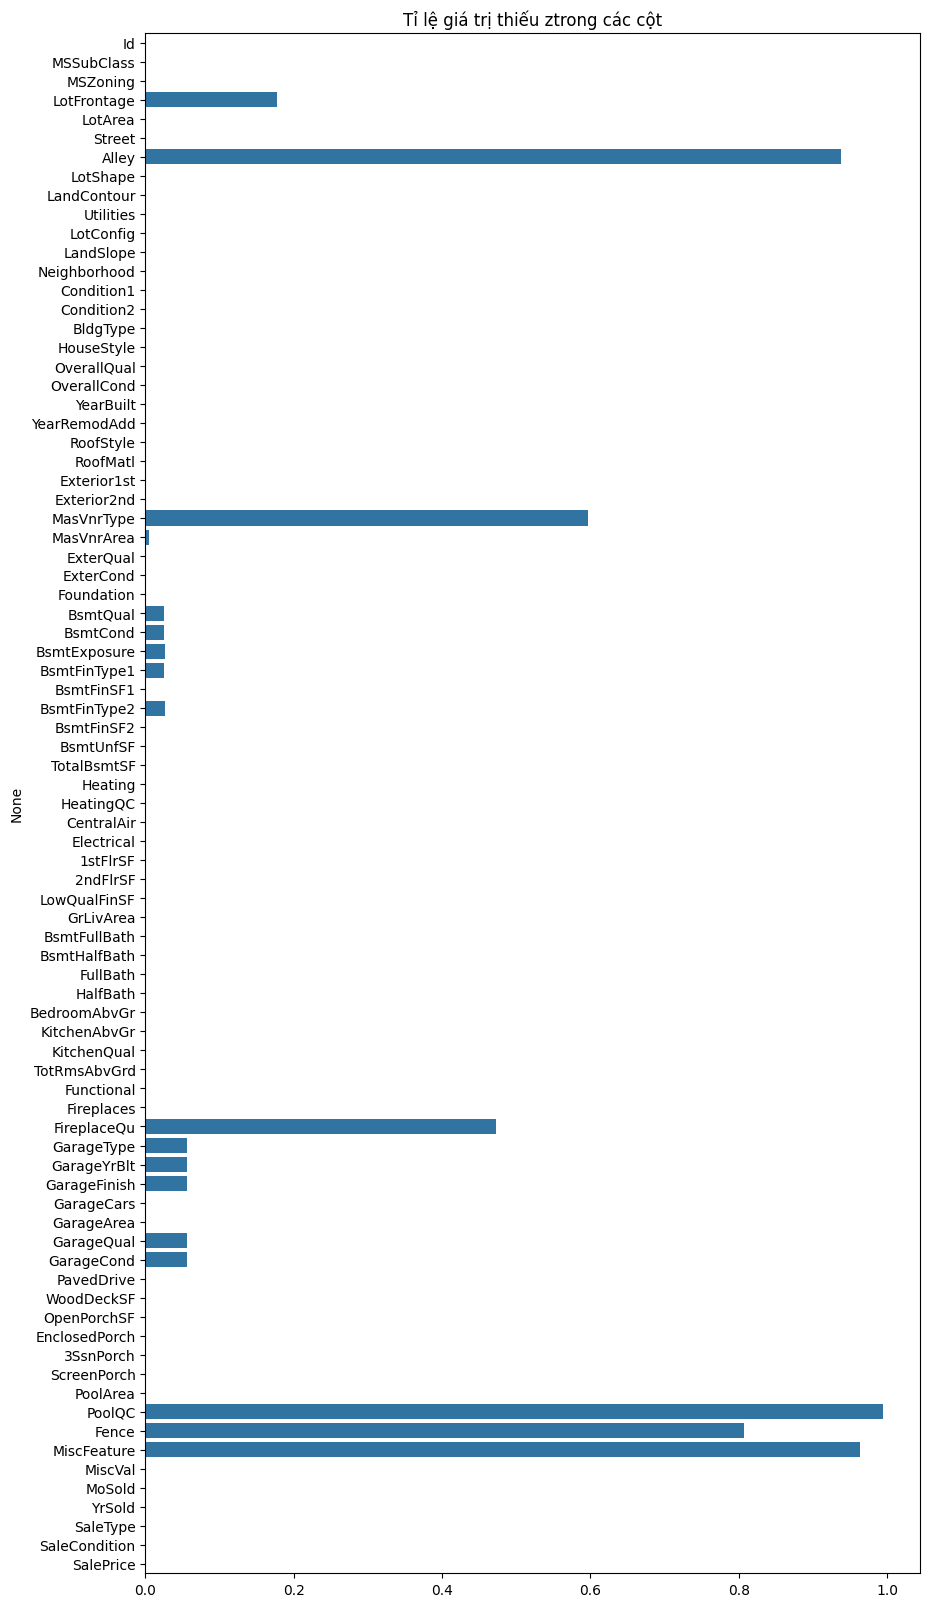

In [7]:
### Kiểm tra giá trị thiếu ###
missing_rate = train.isnull().sum() / len(train)
# Trực quan hóa giá trị thiếu
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 20))
sns.barplot(x=missing_rate.values, y=missing_rate.index)
plt.title("Tỉ lệ giá trị thiếu ztrong các cột")
plt.show()

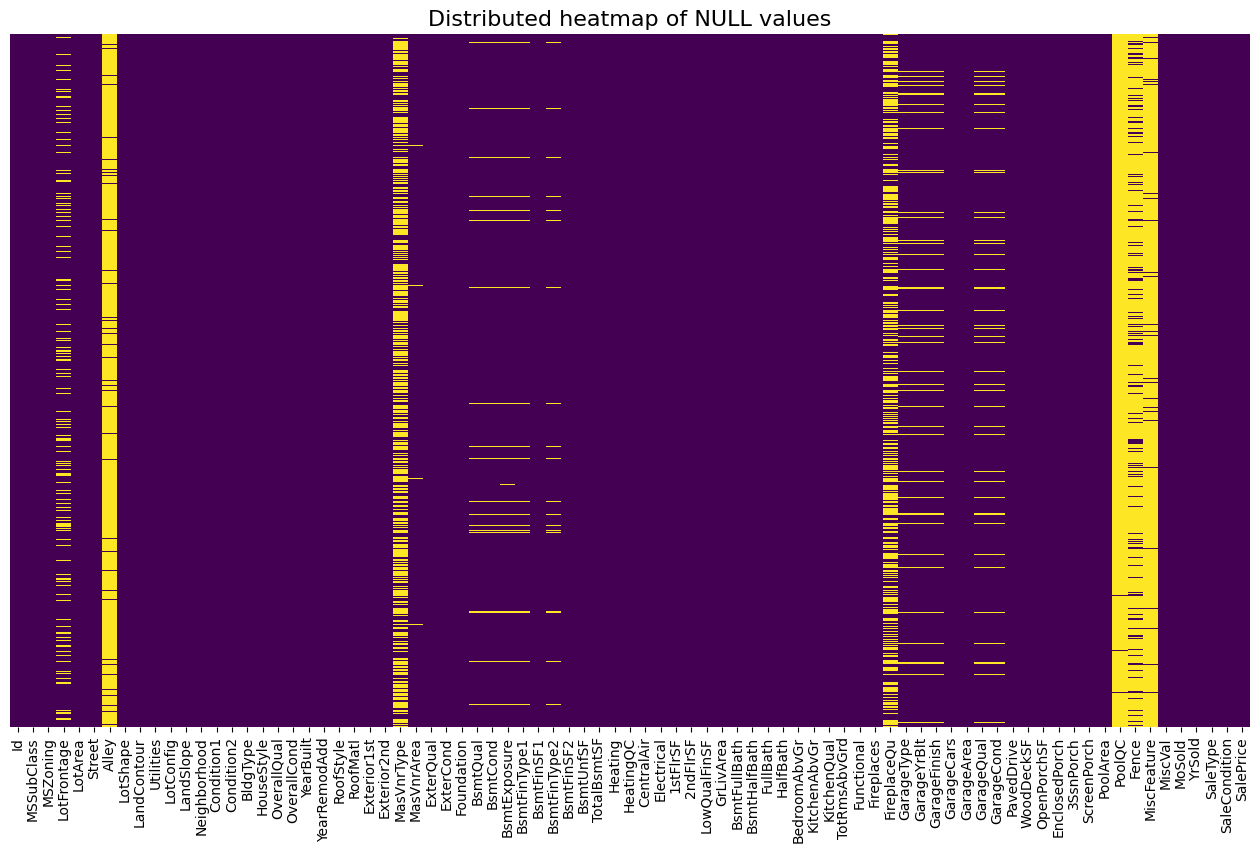

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Distributed heatmap of NULL values', fontsize=16)
plt.show()

EXPLORATORY DATA ANALYSYS

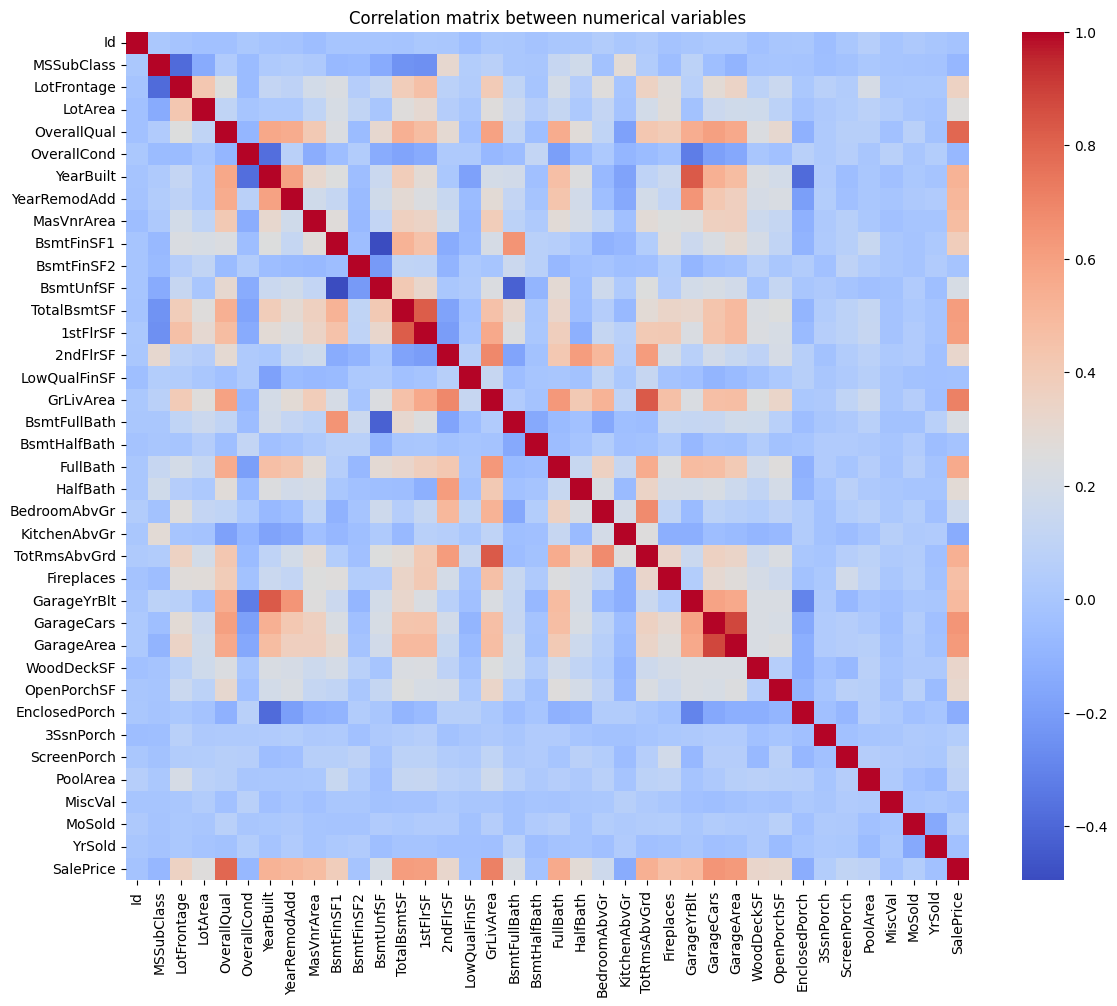

In [8]:
# Lấy các giá trị numeric để so sánh tương quan
numeric_cols = train.select_dtypes(include=['number']).columns

# Heatmap cho các giá trị numeric
plt.figure(figsize=(12, 10))
correlation_matrix = train[numeric_cols].corr()
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm')
plt.tight_layout()
plt.title("Correlation matrix between numerical variables")
plt.show()


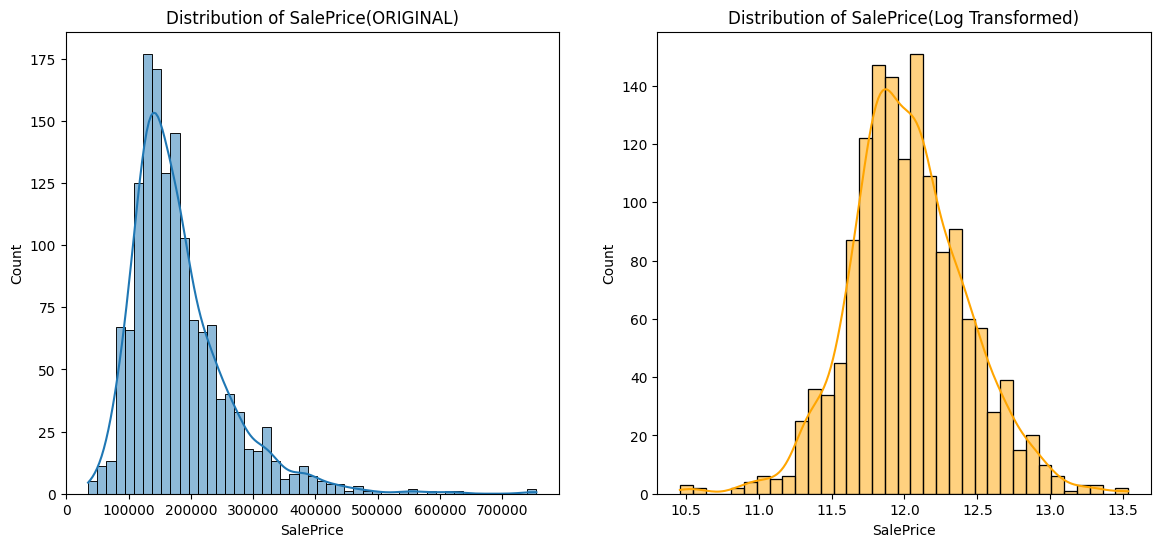

In [14]:
# Biến mục tiêu SalePrice
import numpy as np

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(train["SalePrice"], kde=True)
plt.title(f"Distribution of {"SalePrice"}(ORIGINAL)")

train["SalePrice"]= np.log1p(train["SalePrice"])

plt.subplot(1,2,2)
sns.histplot(train["SalePrice"], kde=True, color='orange')
plt.title(f"Distribution of {"SalePrice"}(Log Transformed)")
plt.show()


In [10]:
import pandas as pd
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder

# Giả sử df là dataframe đã load, SalePrice là biến mục tiêu
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Encode biến categorical thành số để tính F-value
df_encoded = train.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(train[col].astype(str))

X_cat = df_encoded[categorical_cols]
y = df_encoded['SalePrice']

# Tính F-value và p-value
from sklearn.feature_selection import f_classif, f_regression
import numpy as np

f_values, p_values = f_regression(X_cat, y)

# Tạo bảng kết quả
feat_scores = pd.DataFrame({'Feature': categorical_cols, 'F_value': f_values, 'p_value': p_values})
feat_scores = feat_scores.sort_values(by='F_value', ascending=False)

# Top 10 biến categorical
top10_cat = feat_scores.head(10)
print(top10_cat)


         Feature     F_value        p_value
18     ExterQual  994.979678  6.424468e-167
21      BsmtQual  914.659103  2.286498e-156
30   KitchenQual  775.262307  3.559116e-137
34  GarageFinish  629.844106  7.922769e-116
32   FireplaceQu  390.463840   3.392688e-77
33    GarageType  303.848427   5.866699e-62
27     HeatingQC  278.007890   2.898928e-57
20    Foundation  249.840256   4.579866e-52
23  BsmtExposure  153.953618   1.112827e-33
17    MasVnrType  125.530544   5.231103e-28


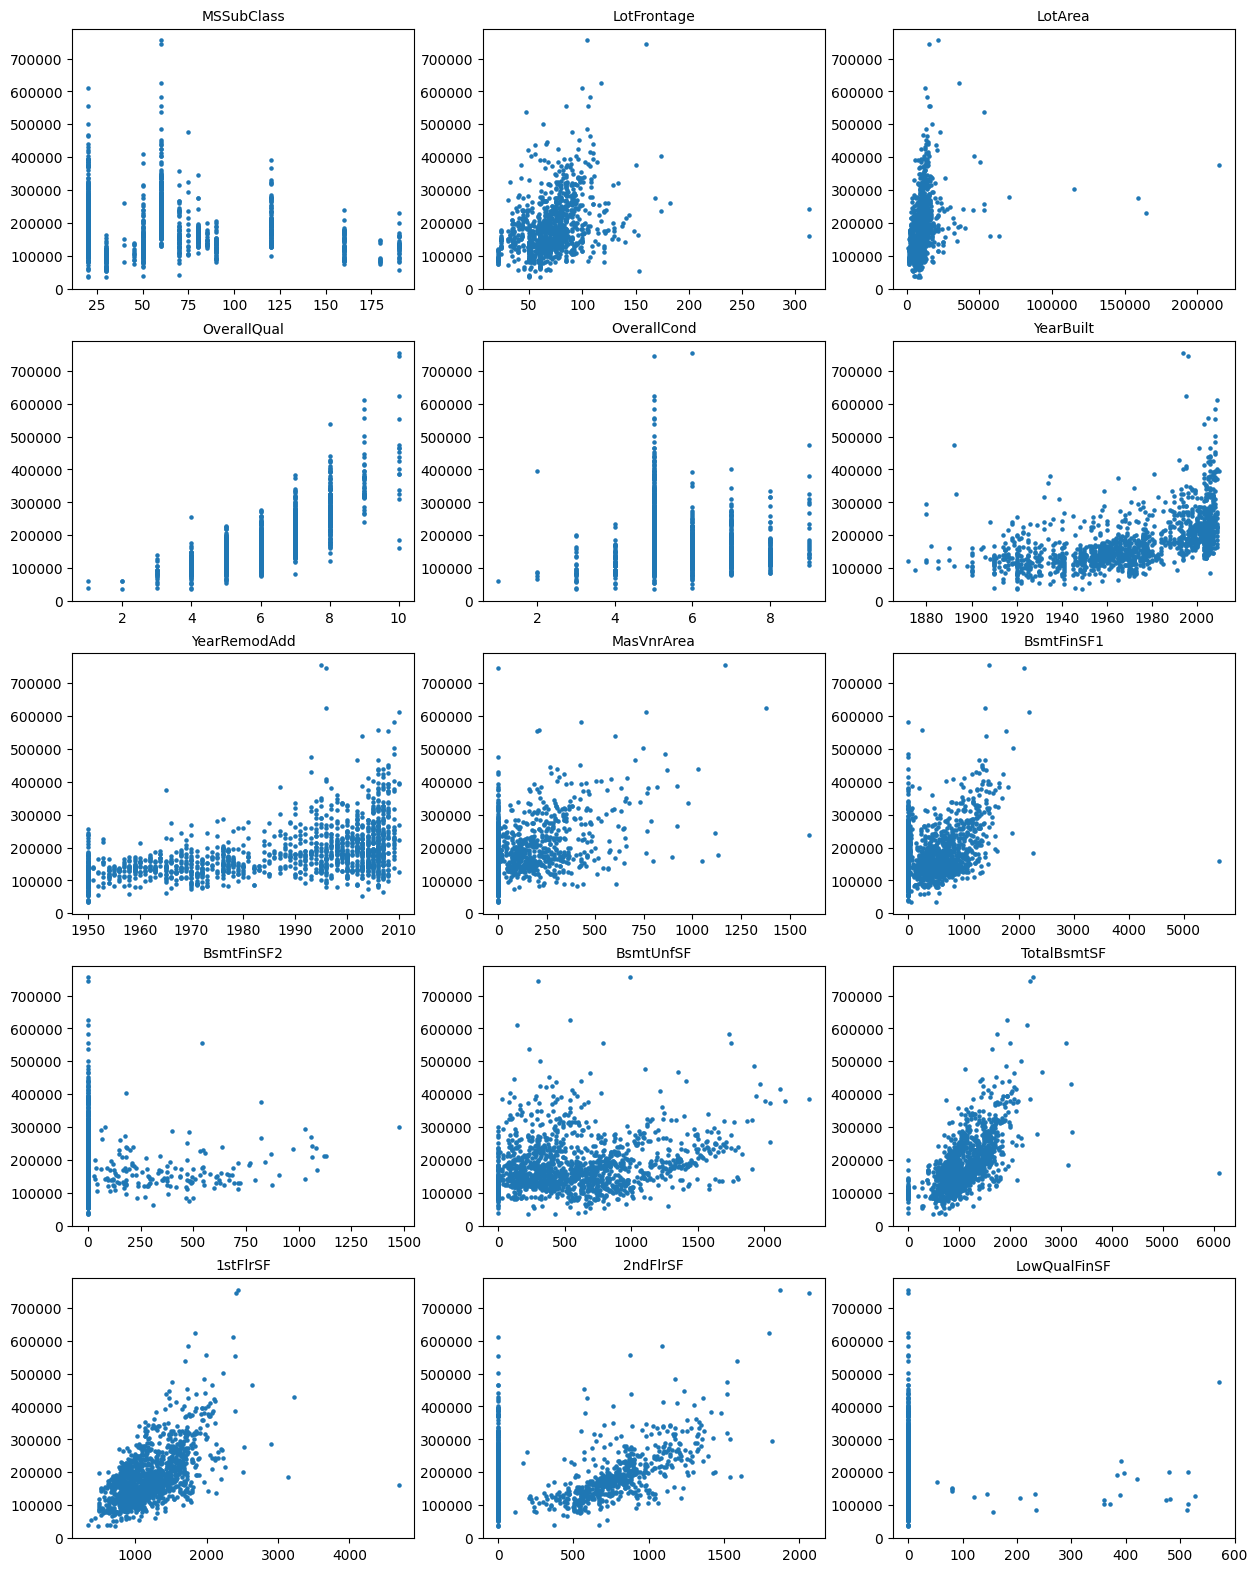

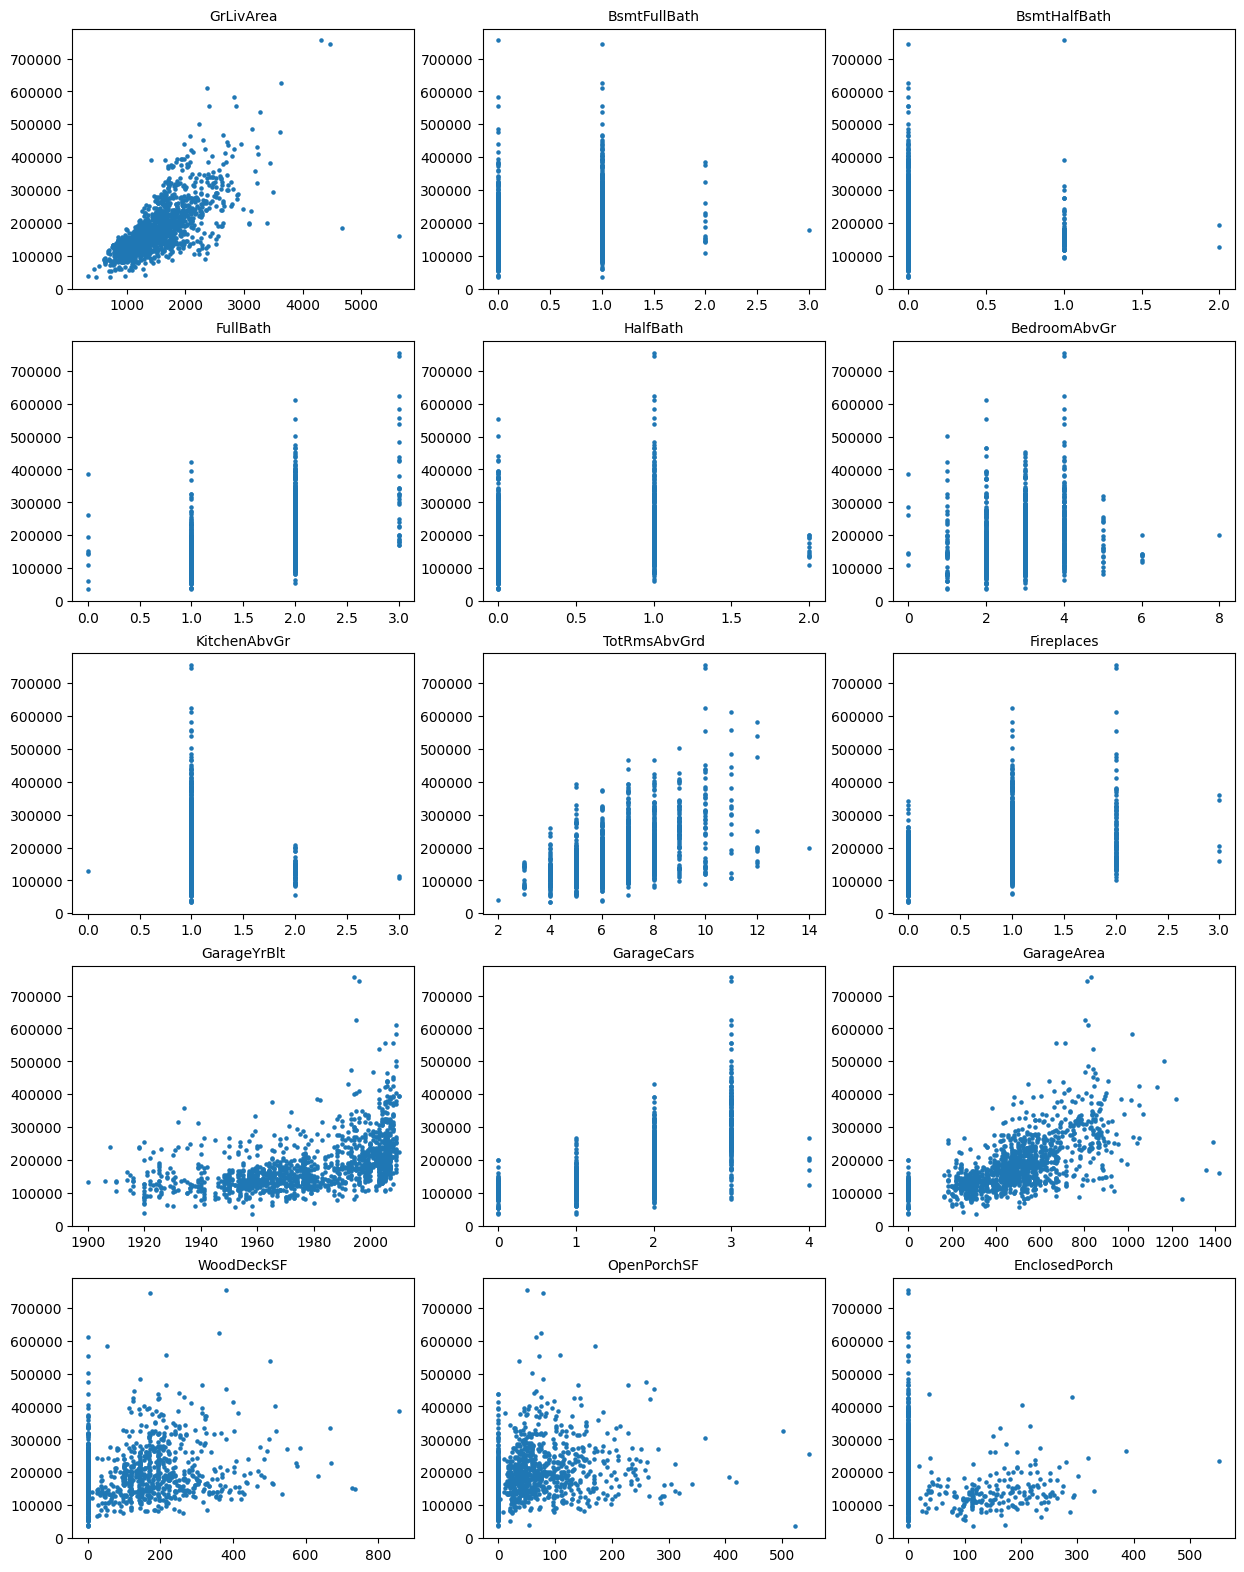

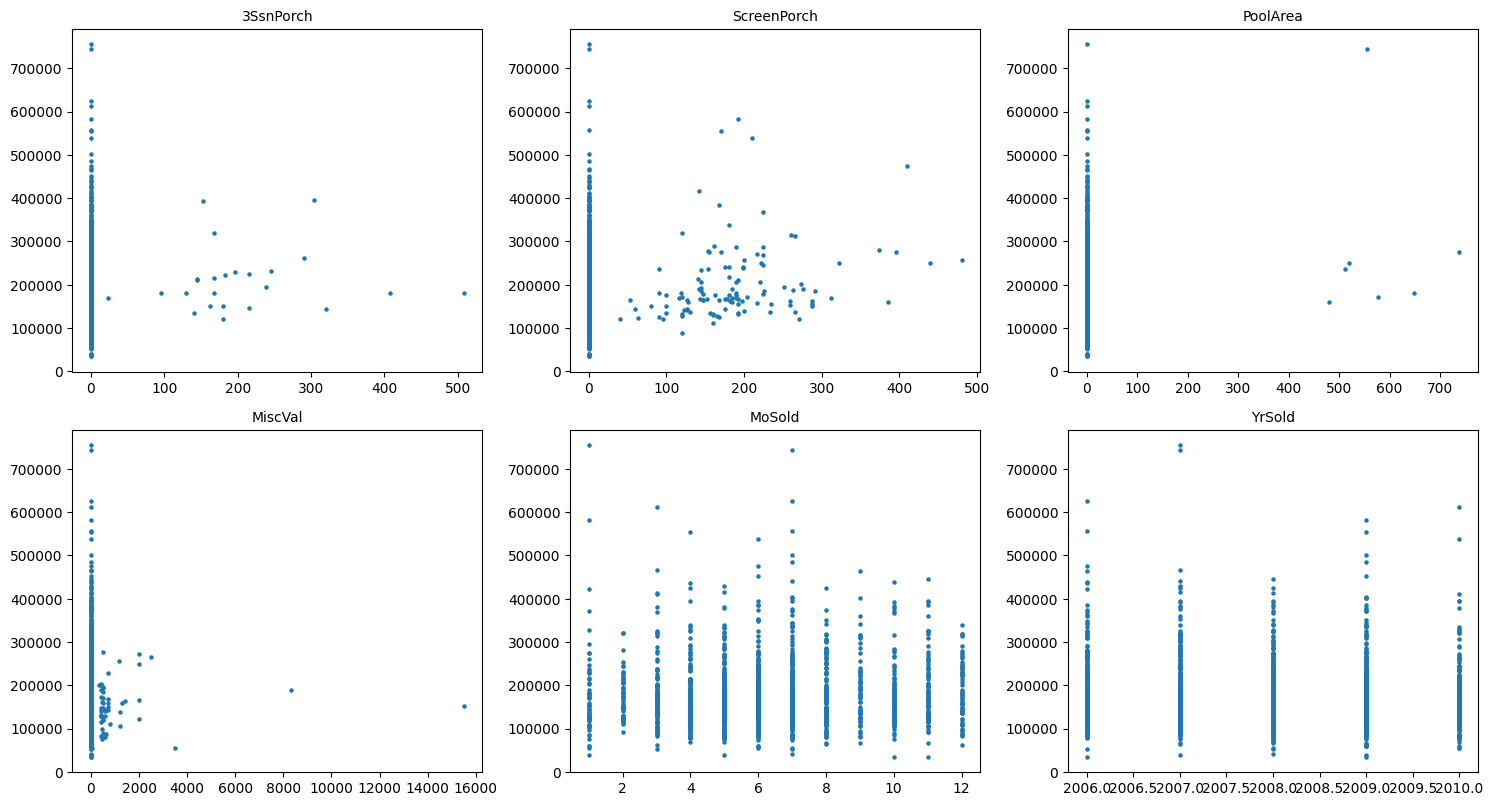

In [11]:
import math


numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'SalePrice' and col != "Id"]

n = len(numerical_cols)

cols = 3
rows = math.ceil(n / cols)

group_size = 15

groups = [numerical_cols[i:i+group_size] for i in range(0, len(numerical_cols), group_size)]

for group_index, group in enumerate(groups):
    plt.figure(figsize=(cols * 5, rows * 4))

    for i, col in enumerate(group, 1):
        plt.subplot(rows, cols, i)
        plt.scatter(train[col], train['SalePrice'], s=5)
        plt.title(col, fontsize=10)
        plt.xlabel("")
        plt.ylabel("")

plt.tight_layout()
plt.show()

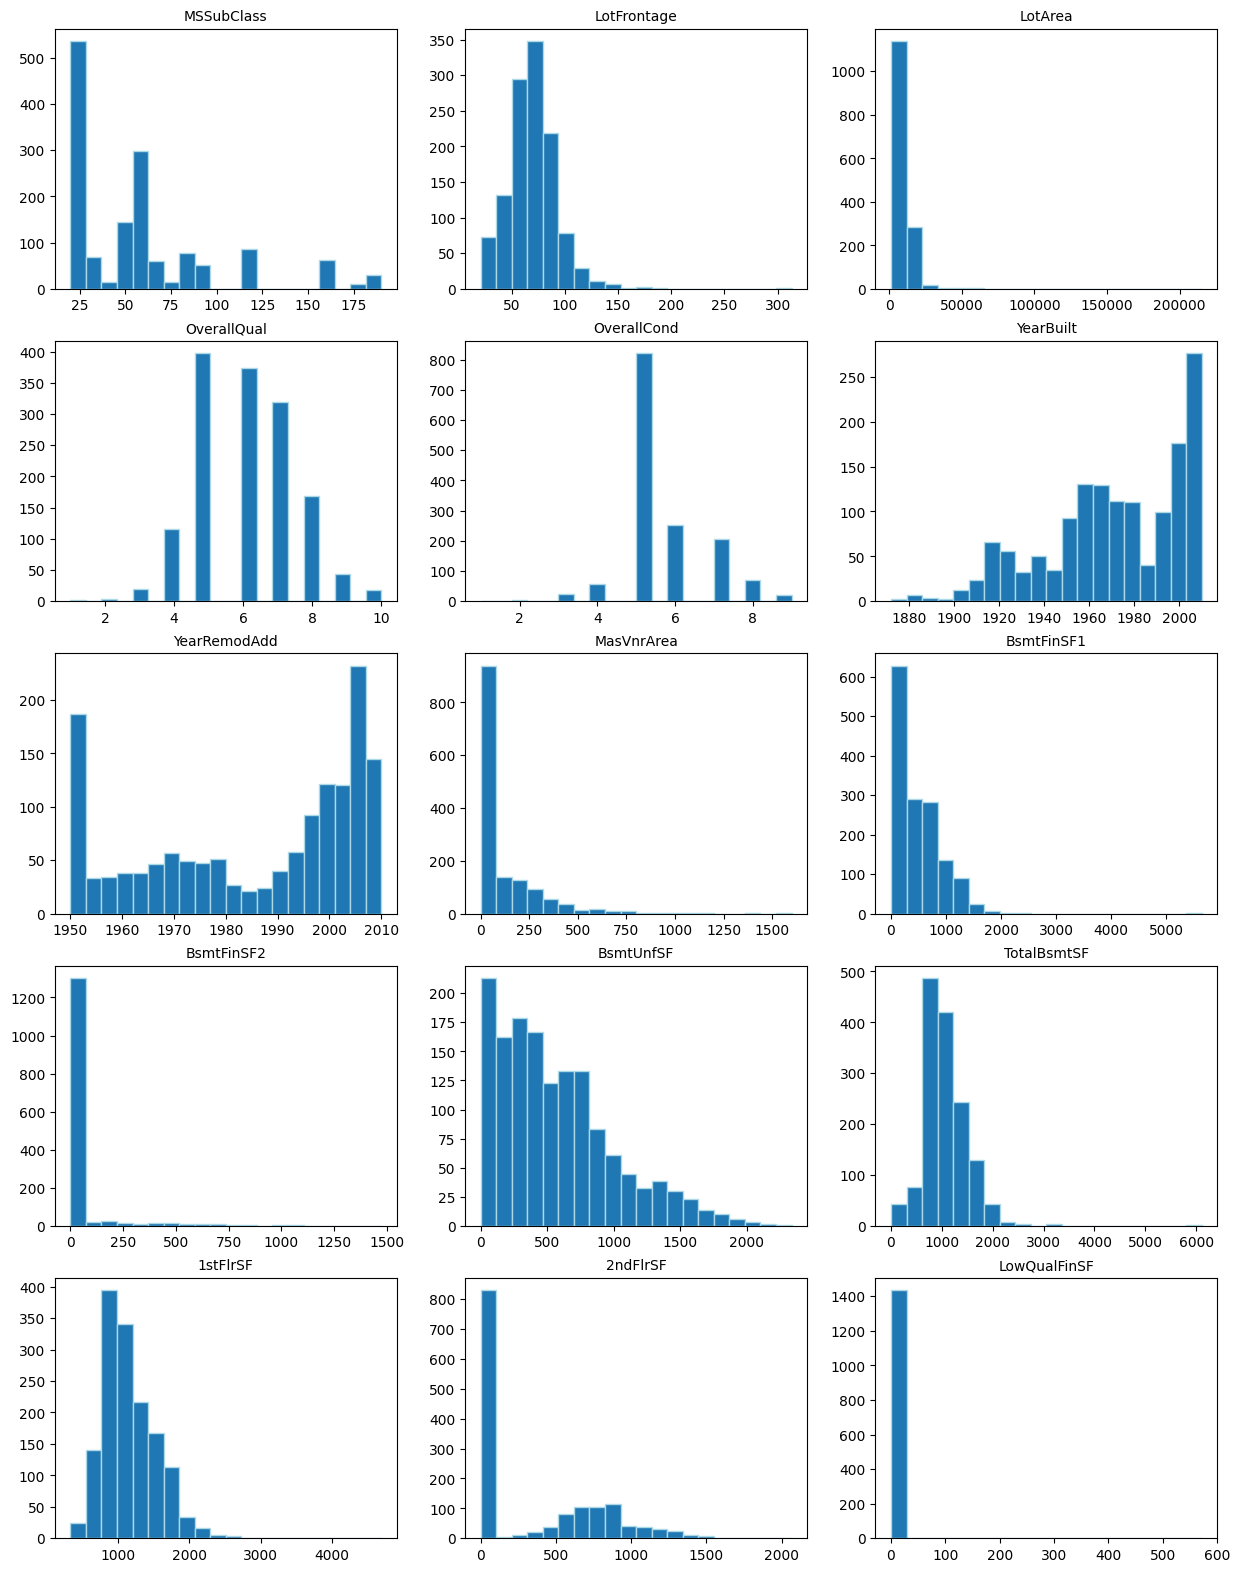

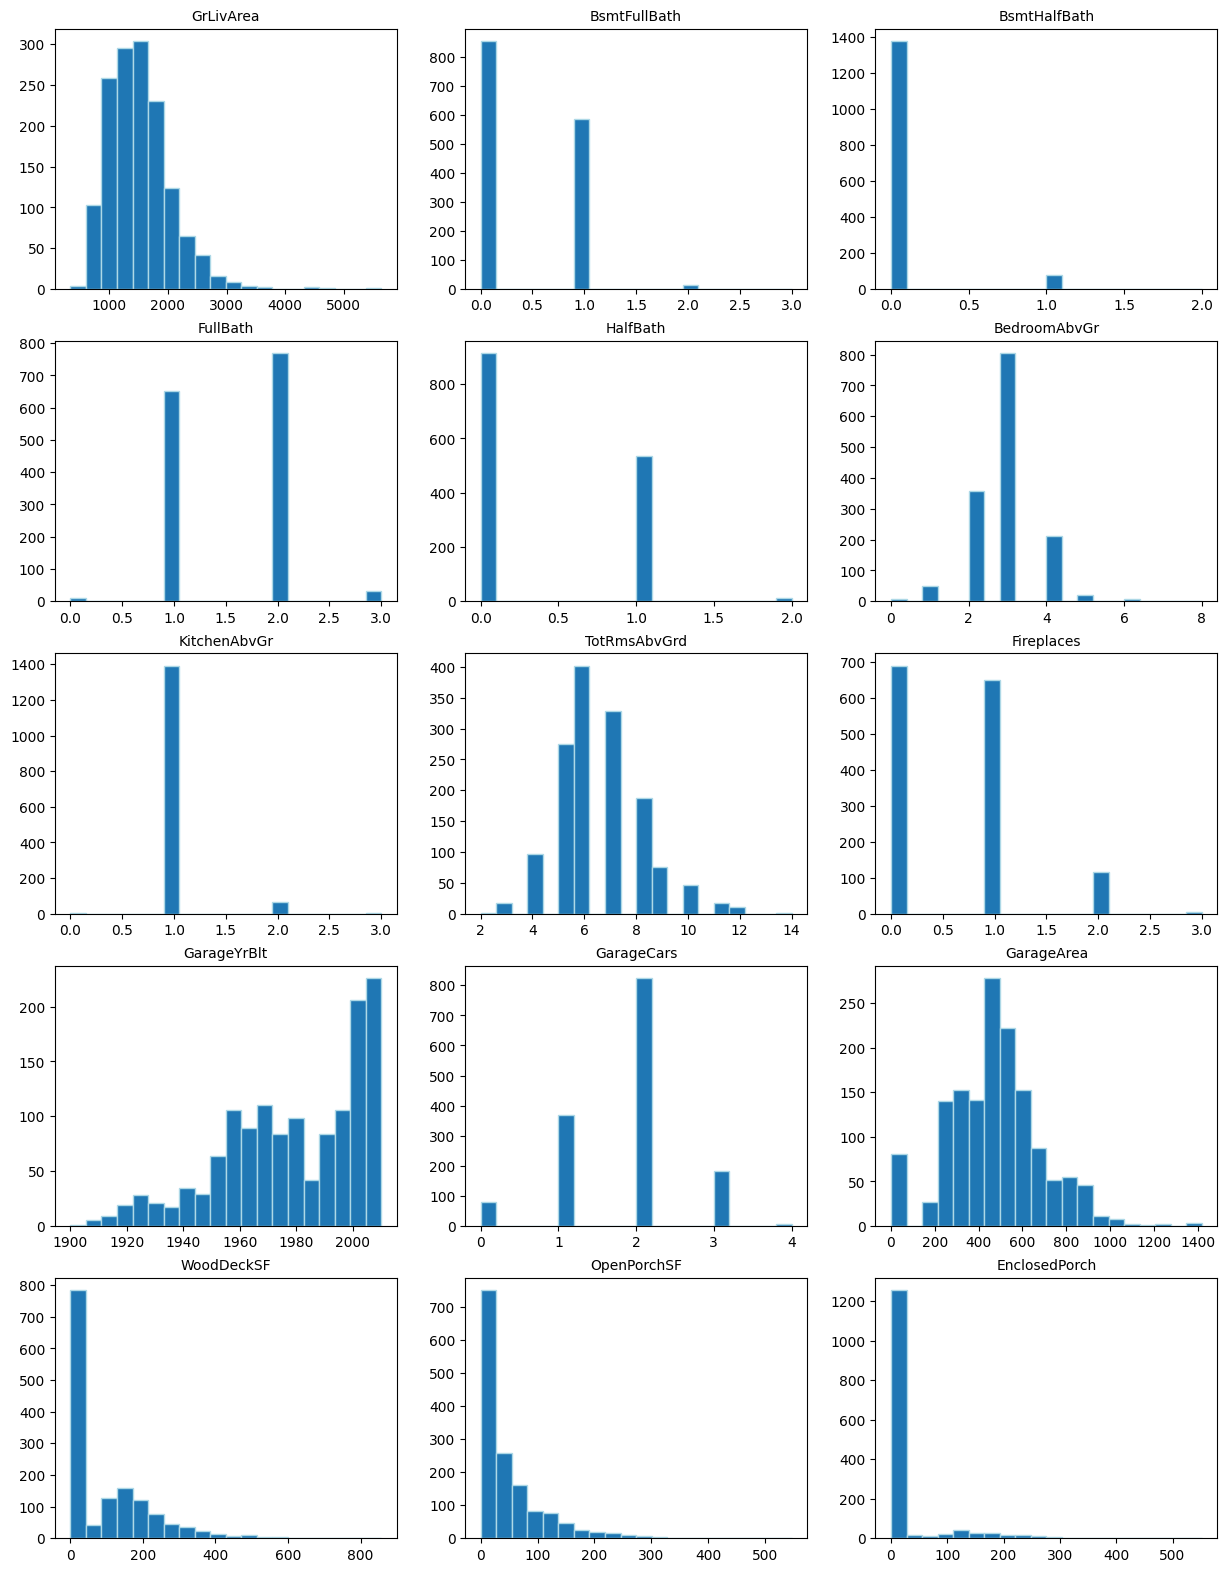

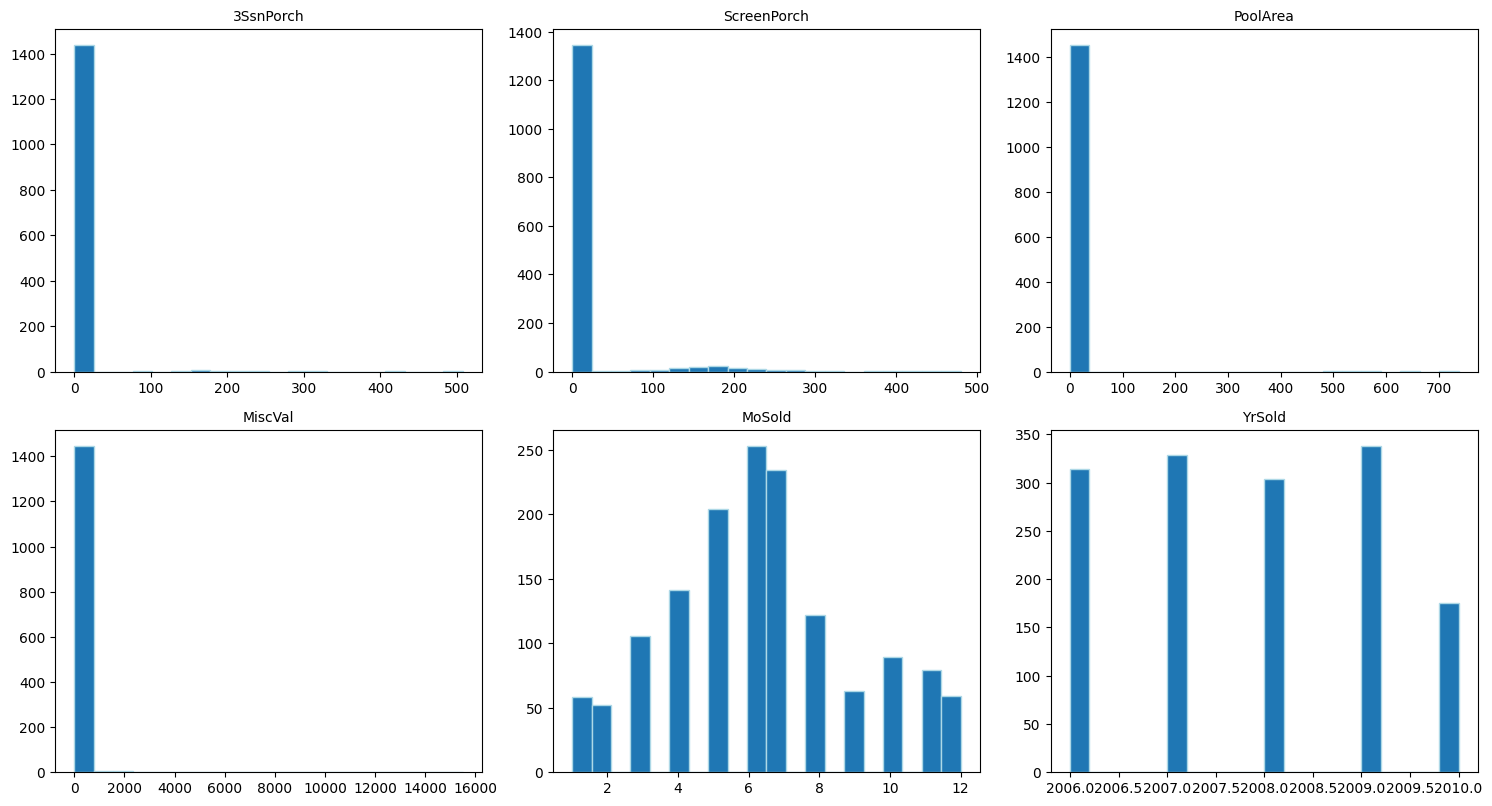

In [12]:
import math


numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'SalePrice' and col != "Id"]

n = len(numerical_cols)

cols = 3
rows = math.ceil(n / cols)

group_size = 15

groups = [numerical_cols[i:i+group_size] for i in range(0, len(numerical_cols), group_size)]

for group_index, group in enumerate(groups):
    plt.figure(figsize=(cols * 5, rows * 4))

    for i, col in enumerate(group, 1):
        plt.subplot(rows, cols, i)
        plt.hist(train[col], bins=20, edgecolor='lightblue')
        plt.title(col, fontsize=10)
        plt.xlabel("")
        plt.ylabel("")

plt.tight_layout()
plt.show()
